In [1]:
# GMM scratch implementation
# import required libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import warnings
import random

warnings.filterwarnings('ignore')

np.random.seed(11)

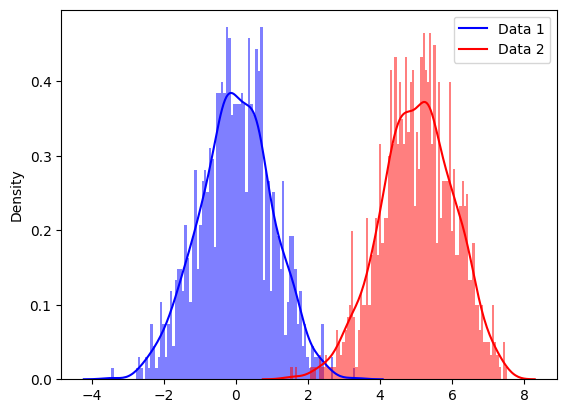

In [2]:
# Generate some data with multiple modes

data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(5, 1, 1000)

# Plot the data using seaborn distplot
sns.distplot(data1, kde=True, hist=True, bins=100, color='b', hist_kws={'alpha': 0.5})
sns.distplot(data2, kde=True, hist=True, bins=100, color='r', hist_kws={'alpha': 0.5})

# Add a legend
plt.legend(['Data 1', 'Data 2'])

plt.show()

In [3]:
# Set the mean and covariance
mean1 = [0,0]
mean2 = [2,0]

cov1 = [[1,.7], [.7,1]]
cov2 = [[.5, .4], [.4, .5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1,cov1, size=1000)
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)

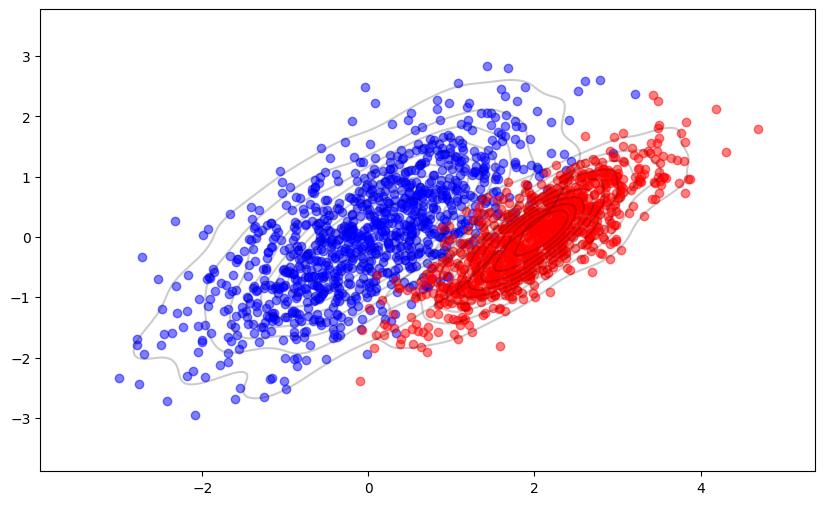

In [4]:
# Plot the given data
plt.figure(figsize=(10, 6))

plt.scatter(data1[:,0], data1[:,1], alpha=0.5, label='Data 1', color='blue')
plt.scatter(data2[:,0], data2[:,1], alpha=0.5, label='Data 2', color='red')

sns.kdeplot(x=data1[:,0], y = data1[:, 1], levels=10, linewidth=10, color='k', alpha=0.2)
sns.kdeplot(x=data2[:,0], y = data2[:, 1], levels=10, linewidth=10, color='k', alpha=0.2)

plt.grid(False)
plt.show()

In [5]:
# Generate data set from different normal distributions
n_samples = 100
mu1, sigma1 = -5, 1.2
mu2, sigma2 = 5, 1.8
mu3, sigma3 = 0, 1.6

x1 = np.random.normal(loc=mu1, scale=np.sqrt(sigma1), size=n_samples)
x2 = np.random.normal(loc=mu2, scale=np.sqrt(sigma2), size=n_samples)
x3 = np.random.normal(loc=mu3, scale=np.sqrt(sigma3), size=n_samples)
X = np.concatenate([x1, x2, x3])

print(X.shape)

(300,)


In [10]:
def plot_pdf(mu, sigma, label, alpha=0.5, linestyle='--', density=True, color='green'):
    # generate data from the normal distribution
    X = norm.rvs(mu, sigma, size=1000)

    # plot the kde (remove bins parameter)
    sns.kdeplot(X, label=label, alpha=alpha, linestyle=linestyle, color=color)

    # Plot the PDF curve
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, color=color, linestyle=linestyle)

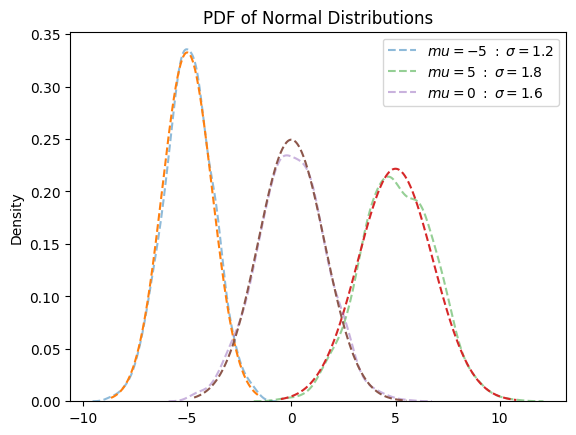

In [11]:
# plot the pdfs
plot_pdf(mu1, sigma1, label=r"$mu={} \ : \ \sigma={}$".format(mu1, sigma1), color=None)
plot_pdf(mu2, sigma2, label=r"$mu={} \ : \ \sigma={}$".format(mu2, sigma2), color=None)
plot_pdf(mu3, sigma3, label=r"$mu={} \ : \ \sigma={}$".format(mu3, sigma3), color=None)

plt.title('PDF of Normal Distributions')
plt.legend()
plt.show()

In [12]:
# Random initialization of parameters
def random_init(n_components):
    """ Randomly initialize the parameters for GMM."""

    pi = np.ones(n_components) / n_components  # equal weights
    means = np.random.choice(X, n_components)  # random means from the data
    variances = np.random.random_sample(size=n_components)  # random variances

    plot_pdf(means[0], variances[0], 'Random init 01')
    plot_pdf(means[1], variances[1], 'Random init 02', color='orange')
    plot_pdf(means[2], variances[2], 'Random init 03', color='red')

    plt.title('Random Initialization of GMM Parameters')
    plt.legend()
    plt.show()

    return means, variances, pi

In [ ]:
# Step 02: Expectation Step (E step)
def step_expectation(X, n_components, mean, variances):
    """ E step: Calculate the responsibilities for each component."""

    weights = np.zeros((n_components, X.shape[0]))
    
  